In [ ]:
import prepare_data
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook 
plt.rcParams['figure.figsize'] = (10, 10)
ts = np.load("../ts.npy").astype(np.uint8)
td = np.load("../td.npy").astype(np.uint8)
fig = plt.figure(2)
sz = 2
offset = 5555
for i in range(sz):
    fig.add_subplot(sz, 2, i * 2 + 1)
    plt.imshow(ts[offset + i], cmap='gray')
    fig.add_subplot(sz, 2, i * 2 + 2)
    plt.imshow(td[offset + i])
plt.show()

In [1]:
import cnn
a = cnn.CNN(gray=True)

/home/pakalns/.local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
a.generator(silent=True)

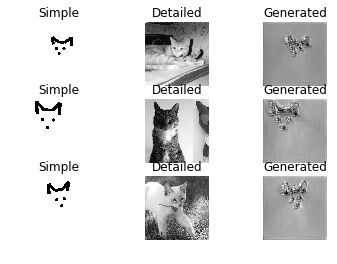

In [38]:
r = 3
a.load_data()
# a.load("../model20180322-012806.h5")
f = 123
ims, imd = a.sdata[f:][:r], a.ddata[f:][:r]
ims, imd = np.asarray(ims), np.asarray(imd)
img = a.G.predict(ims)

# Rescale images 0 - 1
ims = (ims + 0.5)
imd = (imd + 0.5)
img = (img + 0.5)

titles = ['Simple', 'Detailed', 'Generated']
fig, axs = plt.subplots(r, 3)

ims = np.reshape(ims, ims.shape[:-1])
imd = np.reshape(imd, imd.shape[:-1])
img = np.reshape(img, img.shape[:-1])

for i in range(r):
    axs[i,0].imshow(ims[i], cmap='gray')
    axs[i,1].imshow(imd[i], cmap='gray')
    axs[i,2].imshow(img[i], cmap='gray')
    for j in range(3):
        axs[i, j].set_title(titles[j])
        axs[i, j].axis('off')
# fig.savefig("images/%s/%d.png" % (self.dataset_name, epoch))
# plt.close()
plt.show()

In [5]:
import gan
g = gan.GAN(gray=True)


In [6]:
g.generator(silent=True)
g.discriminator(silent=True)

In [ ]:
g.train(1)